In [216]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch 
import torchvision 
import torch.nn as nn 
import torch.utils.data as data 
import torchvision.transforms as transforms
import torchvision.datasets as dsets 
import torch.nn.functional as F
from torch.utils.data import random_split
 

# Неронна мережа класифікації з лекції 

In [217]:
inputSize = 784
numClasses = 10
numEpochs = 10
learningRate = 0.01 
hidden = 500

In [218]:
batchSize = 100
# Навчальна  вибірка
trainDataset = dsets.MNIST(root="C:\Datasets", 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True,
                            )
# Тестова вибірка
testDataset = dsets.MNIST(root="C:\Datasets", 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (підготовка даних для мережі)
trainLoader = torch.utils.data.DataLoader(dataset=trainDataset, 
                                           batch_size=batchSize, 
                                           shuffle=True,
                                           ) 

testLoader = torch.utils.data.DataLoader(dataset=testDataset,
                                          batch_size=batchSize, 
                                          shuffle=False)


In [219]:
# Подивимося на нашу вибірку
dataIter = iter(trainLoader) 
trainX, trainY = next(dataIter) 

In [220]:
trainX[0].shape

torch.Size([1, 28, 28])

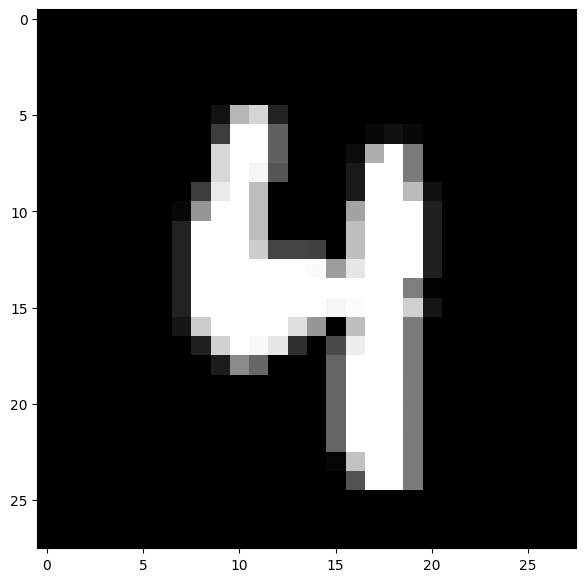

In [221]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[0,0], cmap='gray')
plt.show()

In [222]:
# Створюємо клас
class Classification(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__() 
        self.layer1 = nn.Linear(inputSize, hidden_size) 
        self.relu = nn.ReLU() 
        self.layer2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1) 

    def forward(self, x): 
        out = self.layer1(x)  
        out = self.relu(out) 
        out = self.layer2(out) 
        out = self.softmax(out) 
        return out

model = Classification(inputSize, hidden, numClasses) # Створюємо об'єкт нашої повної мережі

In [223]:
trainX.view(-1, 28*28).shape

torch.Size([100, 784])

In [224]:
trainX.size()

torch.Size([100, 1, 28, 28])

In [225]:
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)  # оптимізатор
losses = [] # тут буде додаватись середня похибка. Список будемо використовувати для побудови графіка
model.train() # перехід у режим навчання (опціонально)

Classification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Епоха: [1/10], Похибка: 0.8505
Епоха: [2/10], Похибка: 0.5427
Епоха: [3/10], Похибка: 0.4221
Епоха: [4/10], Похибка: 0.3725
Епоха: [5/10], Похибка: 0.3016
Епоха: [6/10], Похибка: 0.3677
Епоха: [7/10], Похибка: 0.3417
Епоха: [8/10], Похибка: 0.4502
Епоха: [9/10], Похибка: 0.2704
Епоха: [10/10], Похибка: 0.1408


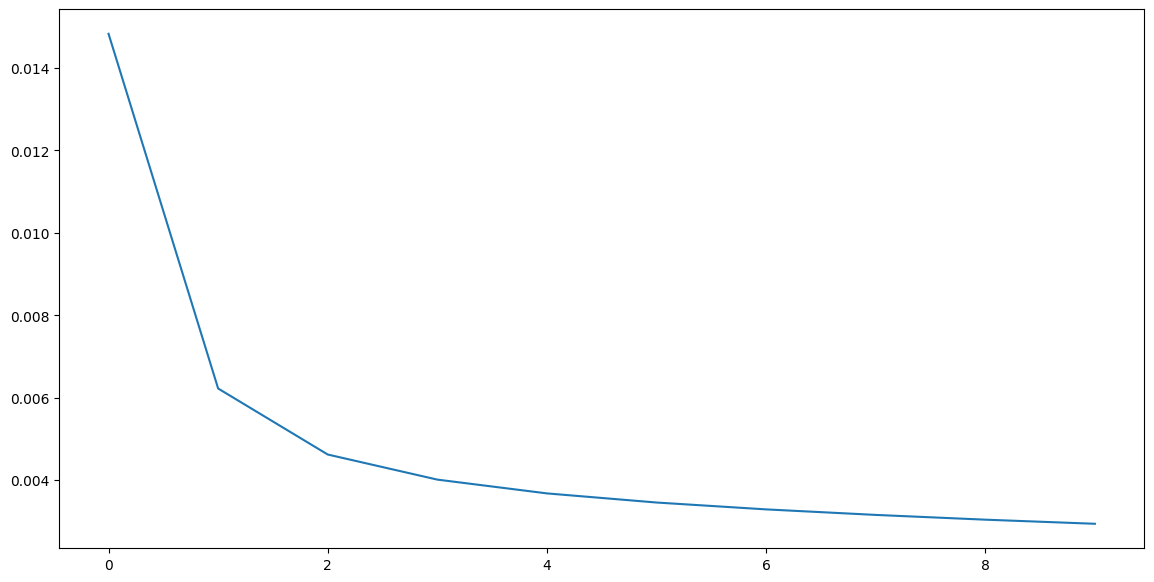

In [226]:
for epoch in range(numEpochs): # кількість епох
    lossTot = 0 # втрати в сукупності

    for i, (images, labels) in enumerate(trainLoader): # проходимося за всіма даними в batch
        images = images.view(-1, 28*28) # наводимо до правильного формату для сітки
        optimizer.zero_grad() # обнулюємо градієнт
        outputs = model(images) # тут наше передбачення
        loss = criterion(outputs.log(), labels) # рахуємо похибку
        
        loss.backward()  # зворотне поширення. 
                         # x.grad += dloss/dx для всіх параметрів x

        lossTot +=loss.item() # інкремент помилки
        
        optimizer.step() # наступний крок спуску

    losses.append(lossTot/len(trainDataset)) # обчислюємо середню помилку та додаємо до списку
    print('Епоха: [%d/%d], Похибка: %.4f' 
           % (epoch+1, numEpochs, loss))
plt.figure(figsize=(14,7))
plt.plot(losses) # Графік нашого навчання
plt.show()

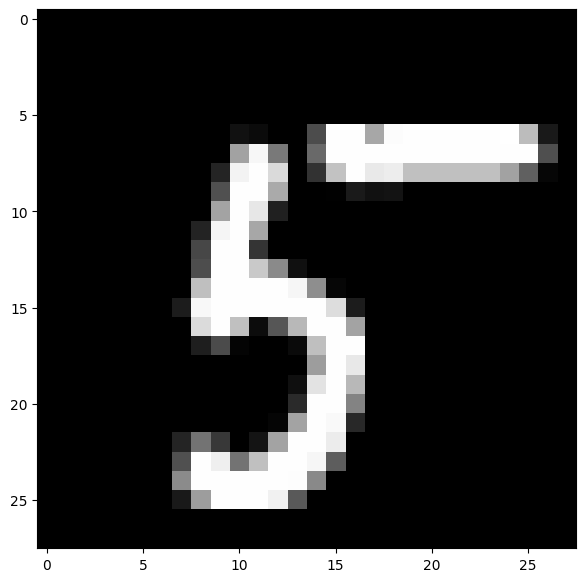

Правильна відповідь tensor(5)


In [227]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[10, 0], cmap='gray')
plt.show()
print('Правильна відповідь', trainY[10])

In [228]:
x = model(trainX[10].view(-1, 784)).detach()
print(x.data)
print(torch.max(x.data,dim=1)) # відповідь у вигляді ймовірностей

tensor([[9.2270e-04, 5.2114e-07, 8.2019e-06, 6.7782e-05, 2.7506e-03, 9.8973e-01,
         1.8682e-05, 1.1172e-05, 5.6950e-03, 7.9924e-04]])
torch.return_types.max(
values=tensor([0.9897]),
indices=tensor([5]))


In [229]:
correct = 0
total = 0

model.eval() # режим перевірки

for images, labels in testLoader: # ітеруємо по перевірочному датасету
    images = images.view(-1, 28*28) # наводимо до потрібного формату
    result = labels
    outputs = model(images) # робимо прогноз
    _, predicted = torch.max(outputs.data, 1) # _ максимальне значення пропускаємо, нас цікавить, що це за цифра
    total += labels.size(0) # 0 - перше/єдине значення
    correct += (predicted == labels).sum() 
    
print('Точність для 10000 картинок: %d %%' % (100 * correct // total))

Точність для 10000 картинок: 92 %


In [230]:
print(outputs[0], torch.max(outputs.data, 1))
print(result)

tensor([3.7249e-04, 1.0505e-02, 9.5387e-03, 6.4138e-03, 7.8563e-04, 3.2591e-02,
        2.2246e-03, 4.3601e-05, 9.3682e-01, 7.0940e-04],
       grad_fn=<SelectBackward0>) torch.return_types.max(
values=tensor([0.9368, 0.4852, 0.9186, 0.9436, 0.5999, 0.4736, 0.8676, 0.8539, 0.9974,
        0.9736, 0.8141, 0.9662, 0.7954, 0.9316, 0.8381, 0.9936, 0.7613, 0.9889,
        0.8304, 0.7875, 0.9810, 0.7911, 0.8118, 0.9914, 0.7835, 0.4190, 0.7653,
        0.9556, 0.9133, 0.9066, 0.9910, 0.9812, 0.9109, 0.9945, 0.9083, 0.9613,
        0.7791, 0.8014, 0.9941, 0.9818, 0.4991, 0.6158, 0.9806, 0.3797, 0.5444,
        0.7567, 0.9754, 0.8981, 0.8703, 0.9901, 0.9820, 0.9554, 0.9888, 0.5744,
        0.6183, 0.7625, 0.9687, 0.8175, 0.9302, 0.2811, 0.9410, 0.9918, 0.9111,
        0.9802, 0.9731, 0.9333, 0.9769, 0.8266, 0.9879, 0.9882, 0.8612, 0.9830,
        0.9843, 0.8346, 0.9953, 0.6409, 0.9547, 0.9813, 0.9842, 0.9667, 0.4978,
        0.8717, 0.5177, 0.9990, 0.9493, 0.7286, 0.6904, 0.9898, 0.9838, 0.9996

# Неронна мережа класифікації з 2 прихованими шарами та функцією втрат MSELoss  та оптимізатором  Adam

## Визначення змінних

In [252]:
inputSize = 784
hidden = 128
hidden_2 = 20
numClasses = 10
numEpochs = 10
learningRate = 0.01 


## Архітектура моделі

In [253]:
class Classification_3hiden(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_size_2, num_classes):
        super().__init__() 
        self.layer1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, hidden_size_2) 
        self.relu2 = nn.ReLU() 
        self.layer3 = nn.Linear(hidden_size_2, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x): 
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.relu2(out)
        out = self.layer3(out)
        out = self.softmax(out)
        return out

model_3 = Classification_3hiden(inputSize, hidden, hidden_2, numClasses)
print(model_3)

Classification_3hiden(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=128, out_features=20, bias=True)
  (relu2): ReLU()
  (layer3): Linear(in_features=20, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


## Функція втрат та оптимізатор

In [254]:
criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(model_3.parameters(), lr=learningRate) 
losses = [] 
model_3.train() 

Classification_3hiden(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=128, out_features=20, bias=True)
  (relu2): ReLU()
  (layer3): Linear(in_features=20, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

## Навчання моделі

Епоха: [1/10], Похибка: 0.0062
Епоха: [2/10], Похибка: 0.0092
Епоха: [3/10], Похибка: 0.0092
Епоха: [4/10], Похибка: 0.0081
Епоха: [5/10], Похибка: 0.0030
Епоха: [6/10], Похибка: 0.0081
Епоха: [7/10], Похибка: 0.0093
Епоха: [8/10], Похибка: 0.0085
Епоха: [9/10], Похибка: 0.0037
Епоха: [10/10], Похибка: 0.0067


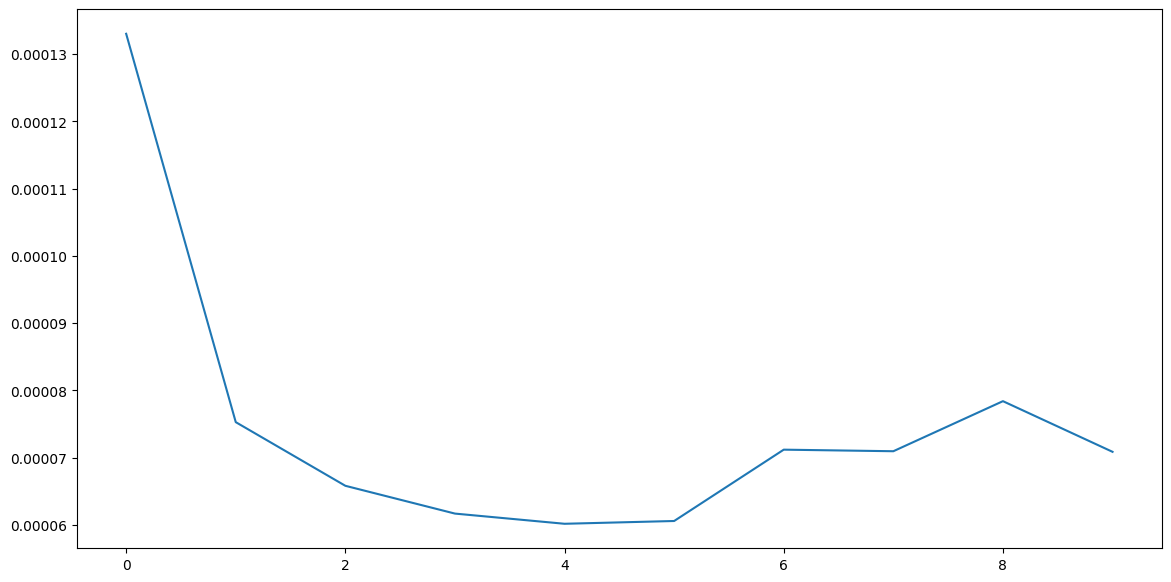

In [255]:
for epoch in range(numEpochs): # кількість епох
    lossTot = 0 # втрати в сукупності

    for i, (images, labels) in enumerate(trainLoader): # проходимося за всіма даними в batch
        images = images.view(-1, 28*28) # наводимо до правильного формату для сітки
               
        optimizer.zero_grad() # обнулюємо градієнт
        outputs = model_3(images) # тут наше передбачення
        labels = F.one_hot(labels,num_classes=numClasses)
        loss = criterion(outputs, labels.float()) # рахуємо похибку 
        loss.backward()  # зворотне поширення. 
                         # x.grad += dloss/dx для всіх параметрів x

        lossTot +=loss.detach().data # інкремент помилки
        
        optimizer.step() # наступний крок спуску

    losses.append(lossTot/len(trainDataset)) # обчислюємо середню помилку та додаємо до списку
    print('Епоха: [%d/%d], Похибка: %.4f' 
           % (epoch+1, numEpochs, loss))
plt.figure(figsize=(14,7))
plt.plot(losses) # Графік нашого навчання
plt.show()

In [256]:
x = model_3(trainX[3].view(-1, 784)).detach()
print(x.data)
print(torch.max(x.data,dim=1)) # відповідь у вигляді ймовірностей

tensor([[1.4743e-13, 3.3231e-32, 7.5584e-11, 1.1102e-12, 2.6782e-21, 9.5936e-22,
         4.7856e-22, 6.5086e-25, 1.0000e+00, 5.7944e-12]])
torch.return_types.max(
values=tensor([1.]),
indices=tensor([8]))


## Розрахунок точності предикції

In [257]:
correct = 0
total = 0

model_3.eval() # режим перевірки

for images, labels in testLoader: # ітеруємо по перевірочному датасету
    images = images.view(-1, 28*28) # наводимо до потрібного формату
    result = labels.view(-1,1).float()
    outputs = model_3(images) # робимо прогноз
    _, predicted = torch.max(outputs.data, 1) # _ максимальне значення пропускаємо, нас цікавить, що це за цифра
    total += labels.size(0) # 0 - перше/єдине значення
    correct += (predicted == labels).sum() 
    
print('Точність для 10000 картинок: %d %%' % (100 * correct // total))

Точність для 10000 картинок: 95 %


## Візулізація предикції

In [261]:
N = 52

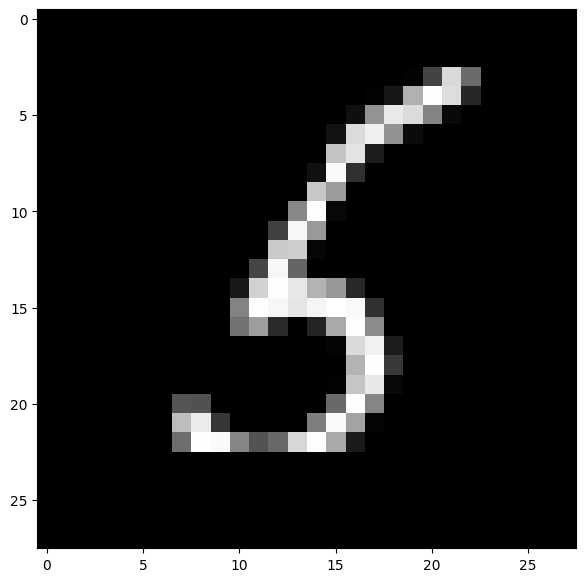

Правильна відповідь tensor(5)


In [262]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[N, 0], cmap='gray')
plt.show()
print('Правильна відповідь', trainY[10])

In [263]:
x = model_3(trainX[N].view(-1, 784)).detach()
print(x.data)
print(torch.max(x.data,dim=1)) # відповідь у вигляді ймовірностей

tensor([[3.2488e-30, 3.8831e-15, 4.8278e-30, 2.5621e-15, 1.7453e-33, 1.0000e+00,
         1.1226e-24, 6.7090e-33, 1.5379e-21, 2.7125e-25]])
torch.return_types.max(
values=tensor([1.]),
indices=tensor([5]))
